# Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from scipy import misc 

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [25]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.

a = np.random.sample((100, 100))
b = np.random.sample((100, 100))

# ============

# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
print(a.ndim)
print(b.ndim, '\n')

# Используйте функцию shape, что она вывела?
print(a.shape)
print(b.shape, '\n')

# ==============

print(a)
print(b)

2
2 

(100, 100)
(100, 100) 

[[0.725477   0.75668461 0.25503846 ... 0.13381796 0.76017323 0.68970233]
 [0.39438117 0.5896735  0.52925522 ... 0.92072097 0.63148415 0.31199909]
 [0.47736511 0.76888602 0.02027594 ... 0.01012829 0.68388113 0.40110655]
 ...
 [0.80425806 0.13835074 0.00168903 ... 0.45423045 0.12568257 0.72295111]
 [0.09323003 0.16885466 0.8071816  ... 0.75137148 0.5858351  0.22826019]
 [0.95694874 0.48622987 0.86766188 ... 0.72509483 0.32683242 0.06681608]]
[[0.71654754 0.34427926 0.21259698 ... 0.47195447 0.21818898 0.60867426]
 [0.44301762 0.85650184 0.33916239 ... 0.4976139  0.96317551 0.11102546]
 [0.03683994 0.17457758 0.77380567 ... 0.83160898 0.29530853 0.79483117]
 ...
 [0.71364733 0.48350695 0.01801526 ... 0.48725518 0.08807625 0.59215143]
 [0.66205176 0.49374232 0.10998489 ... 0.59132427 0.46956894 0.22949016]
 [0.8034196  0.80527339 0.71830929 ... 0.62252603 0.42792476 0.8126013 ]]


In [89]:
# здесь напишите перемножение матриц без использования NumPy и выведите результат 
def mult(a, b):
    tmp = [[0 for col in range(len(a))] for row in range(len(b))]
    for i in range(0, len(a)):
        for j in range(0, len(a)):
            for k in range(0, len(a)):
                tmp[i][j] += a[i][k] * b[k][j]
    return tmp

In [90]:
# здесь напишите перемножение матриц с использованием NumPy и выведите результат
def np_mult(a, b):
    tmp = np.dot(a,b)
    return tmp

In [91]:
%%time
# засечем время работы функции без NumPy
print(mult(a, b))

[[25.827759217209667, 28.32398171354341, 26.137410526152596, 25.200067947211192, 27.159197115217587, 23.892517905379723, 25.61326304009419, 23.96106050278131, 20.741319856946077, 25.960941682937943, 26.825748602540227, 27.784103646424622, 25.339762594690228, 28.126934750076835, 24.59801847348167, 25.1905755092455, 24.94693637894399, 24.37514320473812, 25.109008466851495, 28.686141754007462, 26.10715711697521, 24.809670799321626, 28.35113709568625, 27.287105338084572, 24.912077513005123, 25.418467730607592, 26.511954120212636, 28.626032798561553, 22.568681998849232, 26.016777003115394, 25.04350098971061, 26.834007538897513, 27.839550933905528, 22.15375897770685, 27.80692698017489, 24.58431381739713, 22.302363243317533, 24.734721684819746, 23.102021022331666, 26.743748255138257, 22.00516106234968, 24.19351073781455, 25.200574654649, 25.26019499480776, 27.18700533746479, 26.47519698796066, 26.64442667763928, 25.029995040790677, 24.204706906543546, 25.661547532186567, 24.267525545754317, 2

In [92]:
%%time
# засечем время работы функции с NumPy
print(np_mult(a, b))

[[25.82775922 28.32398171 26.13741053 ... 26.02594263 27.53482962
  26.17950316]
 [25.42714361 26.48424538 25.41451803 ... 26.16491441 25.93370802
  26.56443519]
 [23.22323276 24.53620628 22.65556717 ... 23.7945681  25.62170901
  22.38958768]
 ...
 [27.65856771 27.58775775 25.08485367 ... 24.795748   26.99870874
  25.54688402]
 [23.83070911 25.67478173 23.47484691 ... 23.48240704 24.69750343
  23.56438376]
 [27.00629539 28.72336965 26.16450265 ... 26.87456525 26.18445944
  25.2014129 ]]
Wall time: 1e+03 µs


### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [99]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    S = [ A[0 : (k + 1)].sum() / (k + 1) for k in range(len(A)) ]
    return S

In [109]:
# функция без NumPy
def stupid_sec_av(A):
    S = [sum(A[0:k+1:1]) / (k + 1) for k in range (len(A))]
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее

A = sps.uniform.rvs(size = 10 ** 3) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
S11 = np.array(S1)
S22 = np.array(S2)

#проверим корректность:
np.abs(S11 - S22).sum()

Wall time: 6 ms
Wall time: 146 ms


1.0402789740737717e-13

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [110]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a = 1):
    n = len(X)
    Y = np.array(X) ** 3
    for i in range(1, n, 2):
        Y[i] = a
    Y = Y[::-1]
    if(n % 2 == 0):
        Y = Y[1:n]
        Y = np.append(Y, a)
    Y = np.append(Y, X)
    return Y

In [111]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a = 1):
    Y = [0 for i in range(len(X))]
    for i in range(0, len(X), 2):
        if (len(X) % 2 == 0):
            Y[len(X) - i - 2] = X[i]**3
        else: 
            Y[len(X) - i - 1] = X[i]**3
        if (i == len(X) - 1) and (len(X) % 2 != 0): break 
        else: Y[i + 1] = a
    Y = Y + X.tolist()
    return Y

In [112]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)

#print(len(transformation(X)), len(stupid_transformation(X)), len(X))
#print(stupid_transformation(X), transformation(X))
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 1.3 s
Wall time: 7.4 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [113]:
a = np.random.sample(3)
b = np.random.sample(3)

In [114]:
def stupid_scalar_product(a,b):
    c = [a[i] * b[i] for i in range(len(a))]
    print(c)
    return c

In [115]:
def numpy_scalar_product(a,b):
    c = a * b
    print(c)
    return c

In [116]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)

# проверим корректность:
np.abs(product_1 - product_2).sum()

[0.17215476082372963, 0.0012680180065969234, 0.6424865327699705]
Wall time: 0 ns
[0.17215476 0.00126802 0.64248653]
Wall time: 0 ns


0.0

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [141]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [142]:
print(pic.dtype, pic.shape)

uint8 (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

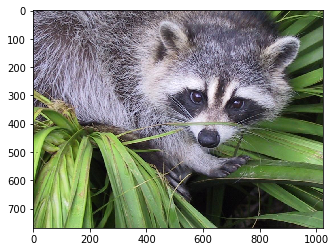

In [143]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [144]:
print(pic[0:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [145]:
print(pic.max(), pic.min(), pic.mean())

255 0 110.16274388631184


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [146]:
pic2 = misc.face(gray=True)

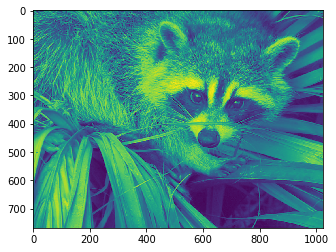

In [147]:
plt.imshow(pic2)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [148]:
print(pic2.shape)
h, w = pic2.shape[:2]

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

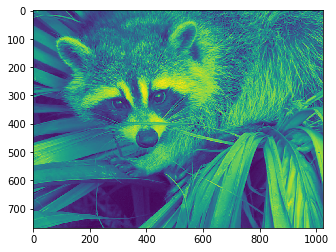

In [149]:
pic3 = np.fliplr(pic2)
plt.imshow(pic3)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

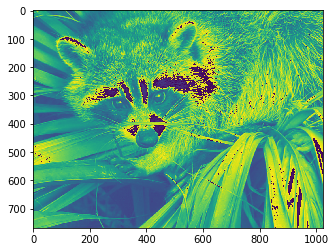

In [150]:
plt.imshow(pic3 + 50)

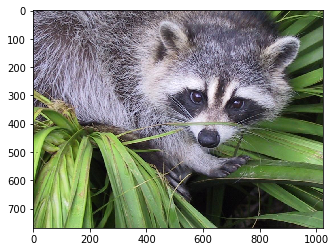

In [151]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [163]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i][j] = np.array((int(pic2[i][j]/150), int(pic2[i][j]/150), int(pic2[i][j]/150)))

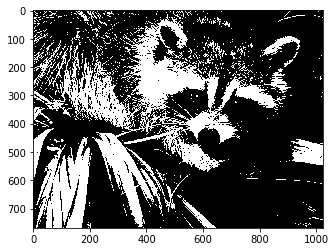

In [164]:
plt.imshow(new_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [165]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

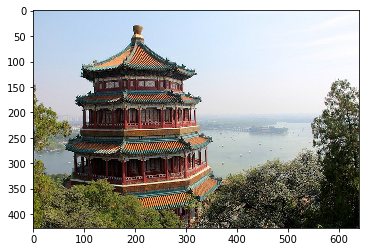

In [175]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [176]:
print(china.shape)
h, w, с = china.shape

(427, 640, 3)


Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

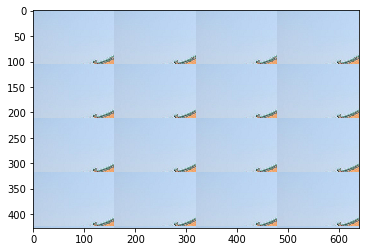

In [187]:
from copy import copy
compressed_pic = copy(china)
for i in range(h):
    for j in range(w):
        compressed_pic[i][j]=compressed_pic[i % int(h/4)][j % int(w/4)]
plt.imshow(compressed_pic)

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [188]:
def calculate_mismatch(a,b):
    mismatch=(a-b)/b
    #тут ваш код
    print(mismatch)

In [189]:
calculate_mismatch(china, compressed_pic)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.32978723 0.16744186 0.04508197]
  [0.32978723 0.16744186 0.04508197]
  [0.32978723 0.16744186 0.04508197]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.34224599 0.17757009 0.04938272]
  [0.34224599 0.17757009 0.04938272]
  [0.34224599 0.17757009 0.04938272]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.34042553 0.17674419 0.04508197]
  [0.34042553 0.17674419 0.04508197]
  [0.34042553 0.17674419 0.04508197]]

 ...

 [[0.97701149 0.67164179 0.13852814]
  [1.31609195 0.960199   0.40692641]
  [1.17241379 0.85074627 0.27272727]
  ...
  [0.56914894 0.38604651 0.18442623]
  [0.40425532 0.25581395 0.05737705]
  [0.39361702 0.24651163 0.04918033]]

 [[1.19767442 0.84924623 0.29694323]
  [1.22543353 0.88       0.34347826]


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [196]:
compressed_pic = copy(china)
for i in range(h):
    for j in range(w):
        compressed_pic[i][j]=np.sin(compressed_pic[i][j])
        #for channel in range(3):
        #    compressed_pic[i][j][channel]=np.sin(compressed_pic[i][j][channel])

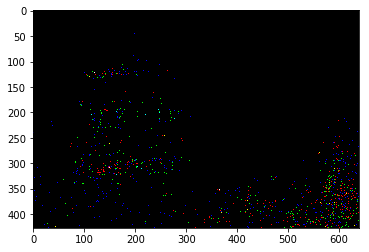

In [197]:
plt.imshow(compressed_pic) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [273]:
import librosa #импортируем библиотеку
import IPython.display

In [274]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [275]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [276]:
print(type(audio), ' ', audio.mean())
librosa.get_duration(y=audio, sr=sr)

<class 'numpy.ndarray'>   2.4665826e-07


5.61922902494331

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

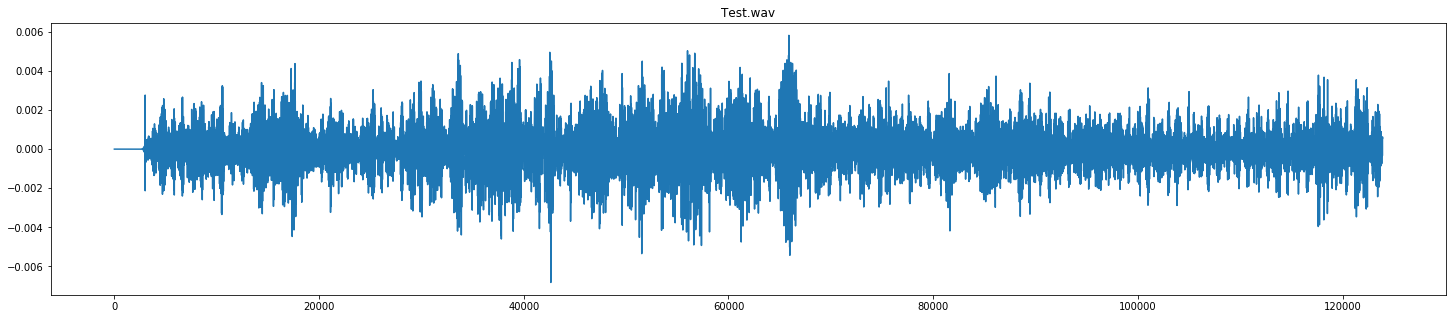

In [277]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

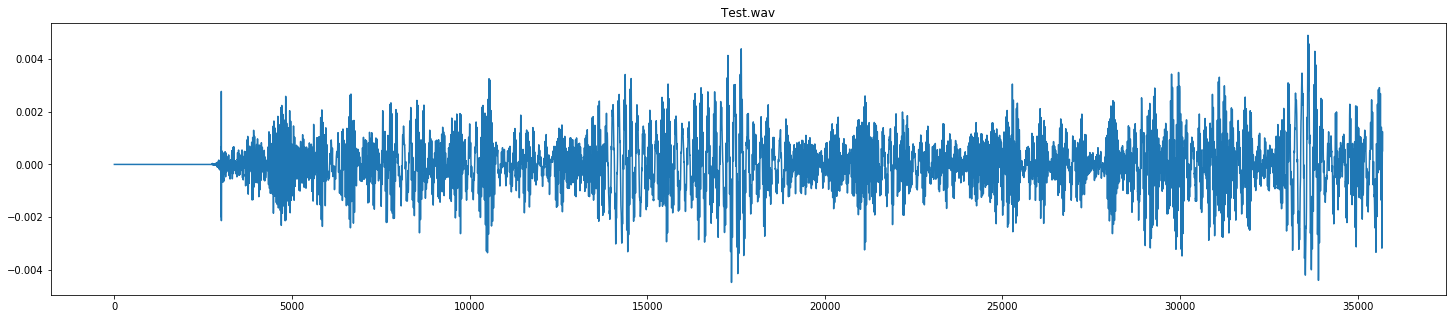

In [278]:
audio, sr= librosa.load('Test.wav', duration=librosa.get_duration(y=audio, sr=sr)-4)
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)
IPython.display.Audio(audio, rate=sr)

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

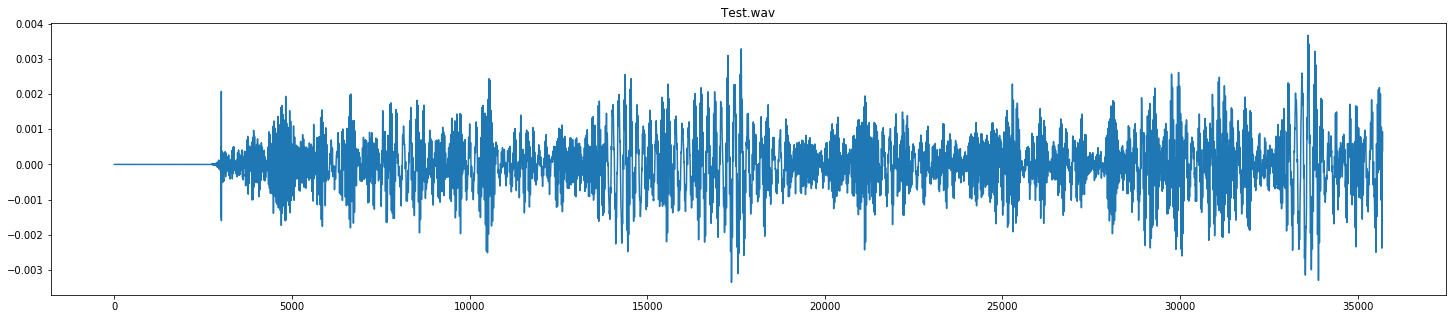

In [279]:
audio = audio*0.75
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)
IPython.display.Audio(audio, rate=sr)

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [252]:
IPython.display.Audio(audio, rate=sr/2)